# Assignment 2

Question 1
Numerical Approximation


In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:


def deriv1(f,x0,h):
    """
    first derivative approximation method where:
    h is the step-size 
    """
    
    return (f(x0 + h) - f(x0)) / h


def deriv2(f,x0,h) :
    
    return (f(x0 + h) - f(x0 - h)) / (2 * h)                        #second method
    


for small value of h, such as h=0.1

In [33]:
print("Approx 1:", deriv1(np.sin, 0.1, 0.0001))
print("Approx 2:", deriv2(np.sin, 0.1, 0.0001))
print("Analytical:     ", np.cos(0.1))

Approx 1: 0.9949991719489237
Approx 2: 0.9950041636197504
Analytical:      0.9950041652780258


Both approximation methods work fine for small values of h

Next, finding the errors for both methods and comparing graphically

In [34]:
x0 = .1
N = 9
hs = np.linspace(0.1, .9, N)

m1 = []
m2 = []
for h in hs:
    m1.append(deriv1(np.sin, x0, h))
    m2.append(deriv2(np.sin, x0, h))

m1 = np.array(m1)
m2 = np.array(m2)

In [35]:
def error(num, ana):
    return np.abs(num - ana) / ana

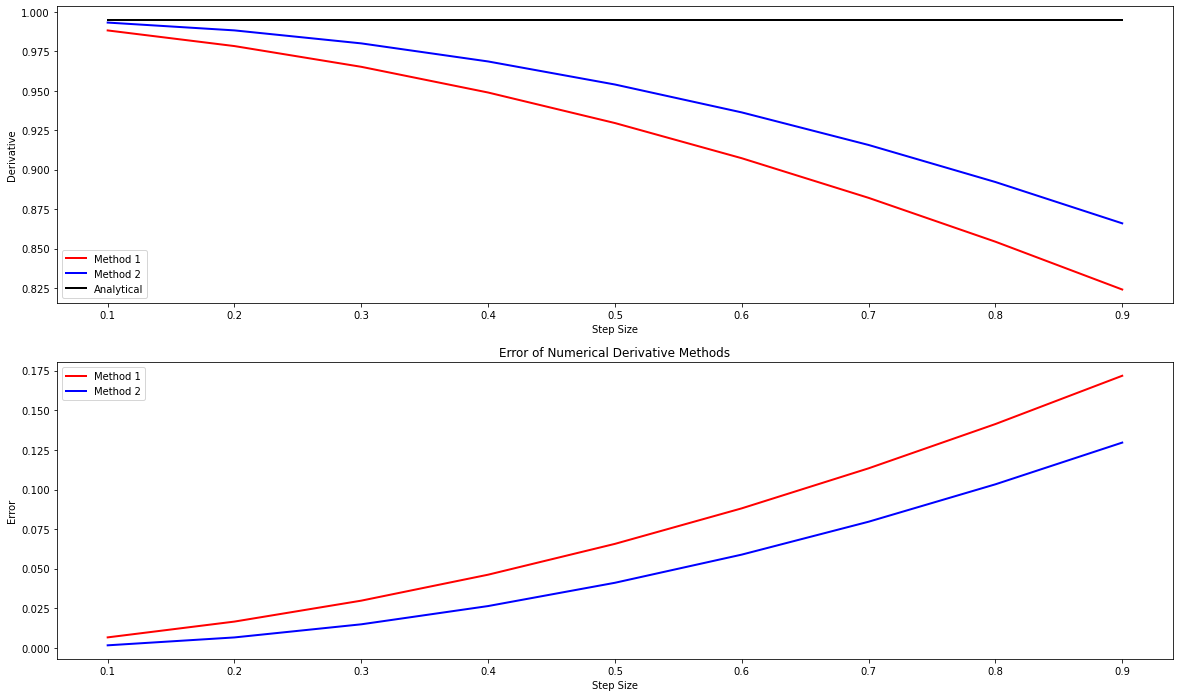

In [36]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(20, 12))

ax1.plot(hs, m1, '-', color='r', linewidth=2, label='Method 1')
ax1.plot(hs, m2, '-', color='b', linewidth=2, label='Method 2')
ax1.plot([.1, .9], [np.cos(x0), np.cos(x0)], '-', color='k', linewidth=2, label='Analytical')
ax1.set_ylabel('Derivative')
ax1.set_xlabel('Step Size')
ax1.legend()

ax2.plot(hs, error(m1, np.cos(x0)), '-', color='r', linewidth=2, label='Method 1')
ax2.plot(hs, error(m2, np.cos(x0)), '-', color='b', linewidth=2, label='Method 2')
ax2.set_title('Error of Numerical Derivative Methods')
ax2.set_ylabel('Error')
ax2.set_xlabel('Step Size')
ax2.legend()

plt.show()

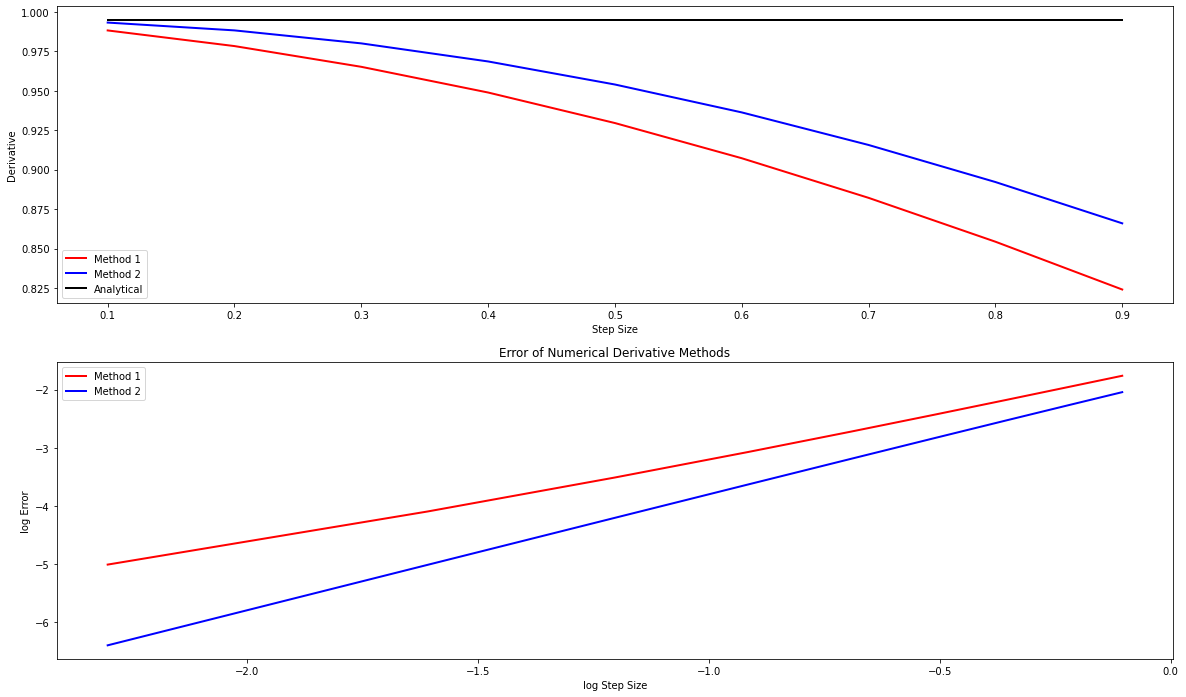

In [37]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(20, 12))

ax1.plot(hs, m1, '-', color='r', linewidth=2, label='Method 1')
ax1.plot(hs, m2, '-', color='b', linewidth=2, label='Method 2')
ax1.plot([.1, .9], [np.cos(x0), np.cos(x0)], '-', color='k', linewidth=2, label='Analytical')
ax1.set_ylabel('Derivative')
ax1.set_xlabel('Step Size')
ax1.legend()

ax2.plot(np.log(hs),np.log(error(m1, np.cos(x0))), '-', color='r', linewidth=2, label='Method 1')
ax2.plot(np.log(hs), np.log(error(m2, np.cos(x0))), '-', color='b', linewidth=2, label='Method 2')
ax2.set_title('Error of Numerical Derivative Methods')
ax2.set_ylabel('log Error')
ax2.set_xlabel('log Step Size')
ax2.legend()


plt.savefig("image_Q1.png")

plt.show()

From the plot of derivative versus step size, it can be seen that both methods work well(give good/accurate approximations) for small values of step size. Moreover,using the plot for the error for the derivative methods shows that both methods are inaccurate for high values of step size. However, method 2 is more accurate than method 1 for small values of step size. The slope (for loglog plot)possibly represents the uncertainty for each method.

.

### Question 2
For each point in the complex plane c = x + iy, with −2 < x < 2 and −2 < y < 2, set $ z_{0} = 0 $ and iterate
the equation $z_{i+1} = z_{i} ^{2} + c $. Note what happens to the $z_{i}$
’s: some points will remain bounded in absolute
value $ |z|^{2} = R(z)^{2} + J(z)^{2} $
, while others will run off to infinity. Make an image in which your points c that
diverge are given one color and those that stay bounded are given another.  Make a second image where the points
are coloured by a colourscale that indicates the iteration number at which the given point diverged.


.


    


<ipython-input-38-5f4666d74b6d>:24: RuntimeWarning: overflow encountered in square
  z = z**2 + c
<ipython-input-38-5f4666d74b6d>:24: RuntimeWarning: invalid value encountered in square
  z = z**2 + c


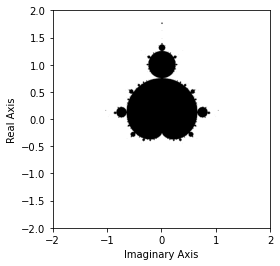

In [38]:
import matplotlib.pyplot as plt
import numpy as np

def function(N, div_check , n) :
    ''' Function creates a set of values for plotting.
    Arguments:
    N: total possible number of iterations
    div_check:  number to check for divergence,
    n: number of points in either dimension

    Returns:
    a 2d array of the convergent/divergent set'''

    x = np.linspace(-2,2,n)
    y = np.linspace(-2j,2j,n)
    X, Y = np.meshgrid(x,y)
    
    c = x[:, np.newaxis] + y[np.newaxis, :]
    
    z0 = 0.0
    z = c  #first iteration
    for j in range(n):

        z = z**2 + c

    # checking for convergence/divergence and build subspace
    function = (np.abs(z)) < div_check
    return function


function = function(50, 50.0, 1000,)






plt.imshow(function, extent=[-2, 2, -2, 2], cmap='binary',)

plt.ylabel('Real Axis')
plt.xlabel('Imaginary Axis')   

plt.savefig("image_Q2a.png")
plt.show()

<ipython-input-39-6ab5ca41640a>:17: RuntimeWarning: overflow encountered in square
  z = z**2 + c
<ipython-input-39-6ab5ca41640a>:17: RuntimeWarning: invalid value encountered in square
  z = z**2 + c
<ipython-input-39-6ab5ca41640a>:21: RuntimeWarning: overflow encountered in absolute
  if (np.abs(z[i][m])) > div_check:


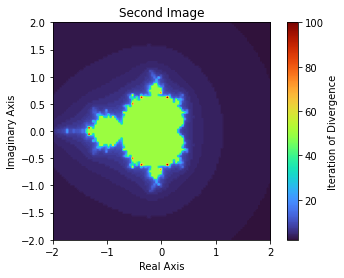

In [39]:
#Second Image

def function_color(N, div_check , n): 

    
    x = np.linspace(-2, 2, n)
    y = np.linspace(-2j, 2j, n)
    c = y[:, np.newaxis] + x[np.newaxis, :]

    function_color = np.zeros((n, n))

    # iteration
    z0 = 0.0
    z = c  # first iteration
    for j in range(n):

        z = z**2 + c

        for i in range(n):  # nested for loop to check if divergent
            for m in range(n):
                if (np.abs(z[i][m])) > div_check:
                    if function_color[i][m] == 0:
                        function_color[i][m] = (j + 1)  # record iteration

    for i in range(n):  # nested for loop to increase convergent iteration
        for m in range(n):
            if function_color[i][m] == 0:
                function_color[i][m] = N
    return function_color


function_color = function_color(50, 50.0, 100)


plt.imshow(function_color, cmap='turbo',  extent=[-2, 2, -2, 2])
plt.colorbar().set_label('Iteration of Divergence')
plt.title('Second Image')
plt.xlabel('Real Axis')
plt.ylabel('Imaginary Axis')

plt.savefig("image_Q2b.png")
plt.show()

<ipython-input-40-3b5c03ea1b3c>:15: RuntimeWarning: overflow encountered in square
  z = z**2 + c
<ipython-input-40-3b5c03ea1b3c>:15: RuntimeWarning: invalid value encountered in square
  z = z**2 + c
<ipython-input-40-3b5c03ea1b3c>:19: RuntimeWarning: overflow encountered in absolute
  if (np.abs(z[i][m])) > div_check:


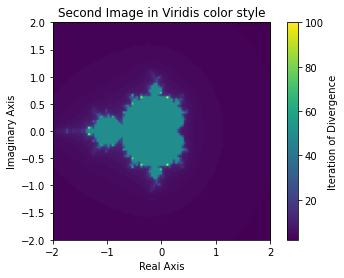

In [40]:
def function_color(N, div_check , n): 

    
    x = np.linspace(-2, 2, n)
    y = np.linspace(-2j, 2j, n)
    c = y[:, np.newaxis] + x[np.newaxis, :]

    function_color = np.zeros((n, n))

    # iteration
    z0 = 0.0
    z = c  # first iteration
    for j in range(n):

        z = z**2 + c

        for i in range(n):  # nested for loop to check if divergent
            for m in range(n):
                if (np.abs(z[i][m])) > div_check:
                    if function_color[i][m] == 0:
                        function_color[i][m] = (j + 1)  # record iteration

    for i in range(n):  # nested for loop to increase convergent iteration
        for m in range(n):
             if function_color[i][m] == 0:
                function_color[i][m] = N
    return function_color


function_color = function_color(50, 50.0, 100)


plt.imshow(function_color, cmap='viridis',  extent=[-2, 2, -2, 2])
plt.colorbar().set_label('Iteration of Divergence')
plt.title('Second Image in Viridis color style')
plt.xlabel('Real Axis')
plt.ylabel('Imaginary Axis')

plt.savefig("image_Q2c.png")
plt.show()

## Question 3
SIR model

In [41]:
from scipy.integrate import odeint


S(t) is those that are susceptible but not yet infected

I(t) is the number of infected individuals

R(t) is those individuals that have recovered and are now immune


In [42]:




def SIR_model(z, t, b, g):
    '''Models the sir system of ODEs:

    Args:
    z = vector of s(t), i(t), r(t)
    t = time steps defult is 1000 change in sir function
    b = beta from SIR model
    g = gamma from SIR model

    Returns:
    An array of dsdt, didt, drdt'''

    s, i, r = z
    n = 1000.0  # given in assignment

    dsdt = -1.0 * b * s * i / n
    didt = b * s * i / n - g * i
    drdt = g * i
    dzdt = [dsdt, didt, drdt]
    return dzdt


def sir_solver(b, g, z0):
    '''new parameter:
    z0 = vector of inital conditions [s0,i0,r0]

    Returns:
    z = vector of s(t), i(t), r(t)]'''

    t = np.linspace(0, 1000)
    z = odeint(SIR_model, z0, t, args=(b, g))
    return z

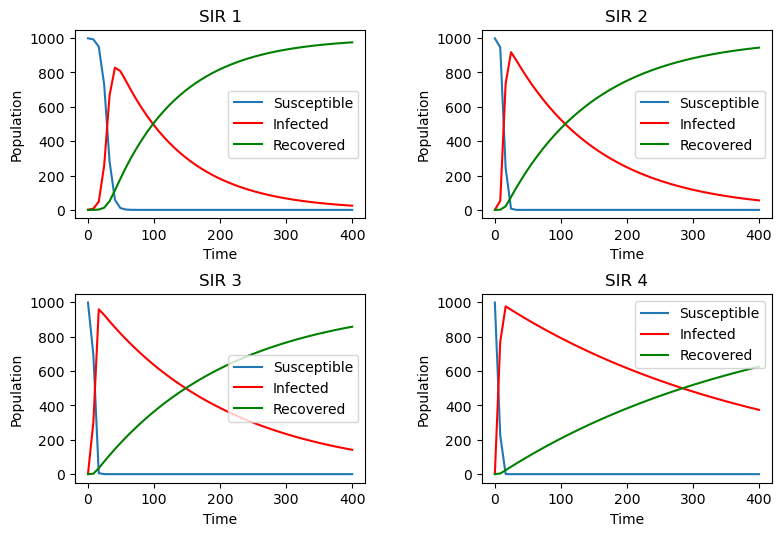

In [43]:

z0 = [999, 1, 0]
b = [0.1, 0.2, 0.3, 0.4]
g = [0.004, 0.003, 0.002, 0.001]
t = np.linspace(0, 400)

fig, ax = plt.subplots(2, 2, dpi=100, figsize=(9, 6))
fig.subplots_adjust(wspace=0.4, hspace=0.4)

# graph1
z1 = sir_solver(b[0], g[0], z0)

ax[0, 0].plot(t, z1[:, 0], label='Susceptible')
ax[0, 0].plot(t, z1[:, 1], label='Infected',color='r')
ax[0, 0].plot(t, z1[:, 2], label='Recovered',color='g')
ax[0, 0].set_xlabel('Time')
ax[0, 0].set_ylabel('Population')
ax[0, 0].set_title('SIR 1')
ax[0, 0].legend()

# graph 2
z2 = sir_solver(b[1], g[1], z0)

ax[0, 1].plot(t, z2[:, 0], label='Susceptible')
ax[0, 1].plot(t, z2[:, 1], label='Infected',color='r')
ax[0, 1].plot(t, z2[:, 2], label='Recovered',color='g')
ax[0, 1].set_xlabel('Time')
ax[0, 1].set_ylabel('Population')
ax[0, 1].set_title('SIR 2')
ax[0, 1].legend()

# GRAPH 3
z3 = sir_solver(b[2], g[2], z0)

ax[1, 0].plot(t, z3[:, 0], label='Susceptible')
ax[1, 0].plot(t, z3[:, 1], label='Infected',color='r')
ax[1, 0].plot(t, z3[:, 2], label='Recovered',color='g')
ax[1, 0].set_xlabel('Time')
ax[1, 0].set_ylabel('Population')
ax[1, 0].set_title('SIR 3')
ax[1, 0].legend()

# GRAPH 4
z4 = sir_solver(b[3], g[3], z0)
ax[1, 1].plot(t, z4[:, 0], label='Susceptible')
ax[1, 1].plot(t, z4[:, 1], label='Infected', color='r')
ax[1, 1].plot(t, z4[:, 2], label='Recovered',color='g')
ax[1, 1].set_xlabel('Time')
ax[1, 1].set_ylabel('Population')
ax[1, 1].set_title('SIR 4')
ax[1, 1].legend()


plt.savefig('SIR_model.png')


plt.show()


Scipy was used to solve the ODE and plots using the matplotlib.pyplot library.In all the above 4 illustrations for the SIR model, it can be seen that there was a sharp drop in cases of susceptible people within a short period of time and a sharp increase in number of infected cases. This shows a pattern of an infectious disease. 